In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [2]:
URL = "https://app2.hkp.com.hk/utx/default.jsp?lang=en"   # transaction history reocrd within 3 years
src = requests.get(URL).content
soup = BeautifulSoup(src, 'lxml')

In [3]:
l = []

for w in soup.find_all('span', 'normalFont'):
    text = w.get_text()
    text = text.replace('\t', '')
    text = text.replace('\r', '')
    text = text.replace('\n', '')
    text = text.replace('\xa0', '')
    l.append(text)
    
    name = pd.Series(l)
    estate = name.str.extract("(\w*\.*\'*\-*\w*\.*\s*\w+\s*\w+\s*\w+)")
    num = name.str.extract('(\d+)Transactions')
    
    table = pd.concat([estate, num], axis=1)
    table.columns = ['Estate_Name', 'Transactions']
    
table.head(20)

,Estate_Name,Transactions
0,Taikoo Shing,871
1,South Horizons,601
2,Kornhill,420
3,Heng Fa Chuen,415
4,Chi Fu Fa Yuen,303
5,Residence Bel,247
6,Island Resort,246
7,Grand Promenade,210
8,Nan Fung Sun Chuen,188
9,Lei King Wan,185


In [4]:
# slicing for dropping unnecessary data
table = table[13:]
table.head()
## clear data before turning into df

,Estate_Name,Transactions
13,Hong Kong Central,NaN
14,The Avenue,163
15,The Zenith,84
16,J Residence,69
17,Illumination Terrace,53


In [5]:
# original # of rows & cols
print(table.shape)

table = table.drop_duplicates()
print(table.shape)

(472, 2)
(438, 2)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
all_table = table.dropna()
all_table.head()

,Estate_Name,Transactions
14,The Avenue,163
15,The Zenith,84
16,J Residence,69
17,Illumination Terrace,53
18,The Legend At Jardine,53


In [8]:
# change data type for plotting
all_table['Transactions'] = all_table['Transactions'].astype(int)

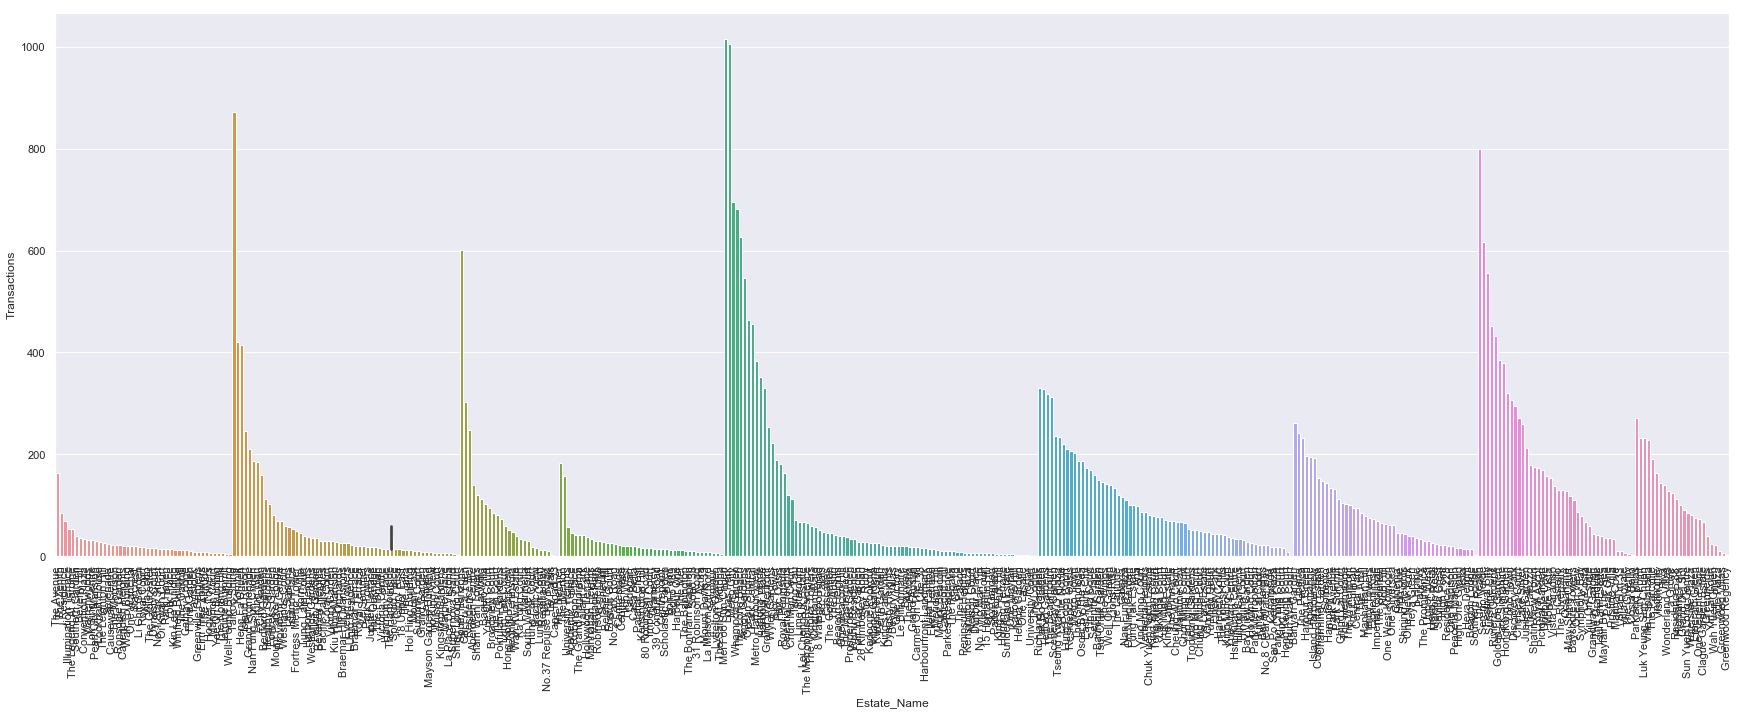

In [9]:
plt.figure(figsize=(30,10))
sns.set()
all_plot = sns.barplot(data = all_table, y = 'Transactions', x = 'Estate_Name')
for item in all_plot.get_xticklabels():
    item.set_rotation(90)

In [10]:
# index for the district names
table[table.Transactions.isnull() == True]

,Estate_Name,Transactions
13,Hong Kong Central,NaN
59,Hong Kong East,NaN
118,Hong Kong South,NaN
145,Hong Kong West,NaN
200,More,NaN
201,Kowloon Central,NaN
275,Kowloon East,NaN
351,Kowloon West,NaN
416,N.T. East,NaN
451,N.T. West,NaN


In [42]:
HKC = all_table.loc[14:59]
HKE = all_table.loc[60:118]
HKS = all_table.loc[119:144]
HKW = all_table.loc[144:187]
KC = all_table.loc[188:277]
KE = all_table.loc[278:353]
KW = all_table.loc[354:402]
NTE = all_table.loc[405:453]
NTW = all_table.loc[454:]

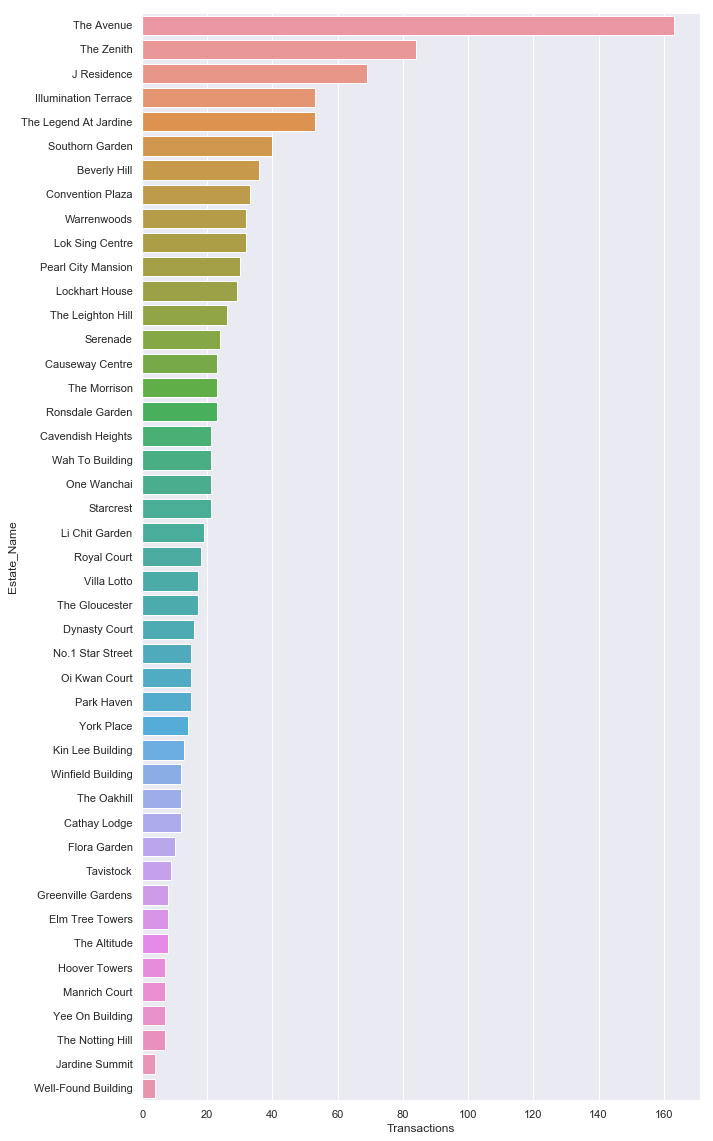

In [22]:
plt.figure(figsize=(10,20))
sns.barplot(data = HKC, x = 'Transactions', y = 'Estate_Name')

In [13]:
district_cols = ['HKC', 'HKE', 'HKS', 'HKW', 'KC', 'KE', 'KW', 'NTE', 'NTW']
district_df = [HKC, HKE, HKS, HKW, KC, KE, KW, NTE, NTW]

In [14]:
# transactoin data for every district
df_l = []

for i in district_df:
    df_l.append(i.Transactions.reset_index().Transactions)
    df = pd.concat(df_l, axis=1)
    
df.columns = district_cols    
df.head()

,HKC,HKE,HKS,HKW,KC,KE,KW,NTE,NTW
0,163.0,871.0,303.0,158.0,696,331.0,261.0,556.0,271.0
1,84.0,420.0,247.0,57.0,681,329.0,242.0,451.0,232.0
2,69.0,415.0,140.0,45.0,627,319.0,233.0,433.0,232.0
3,53.0,246.0,120.0,42.0,547,313.0,196.0,386.0,229.0
4,53.0,210.0,112.0,42.0,464,237.0,194.0,380.0,190.0


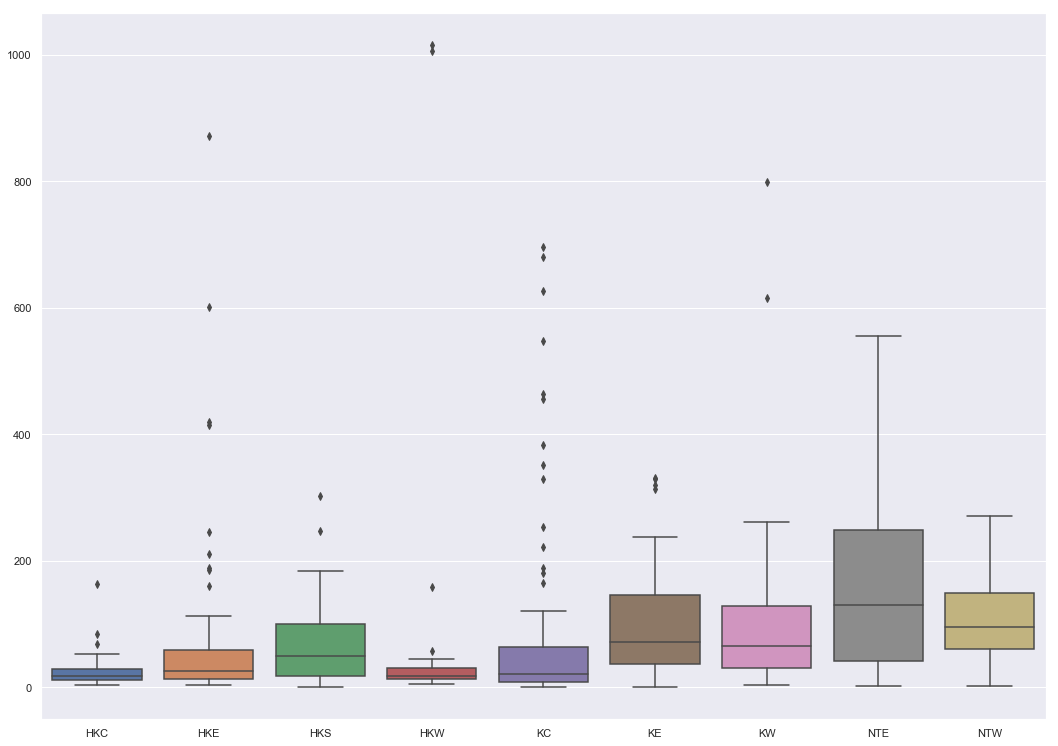

In [15]:
plt.figure(figsize=(18,13))
sns.boxplot(data = df)

<BarContainer object of 24 artists>

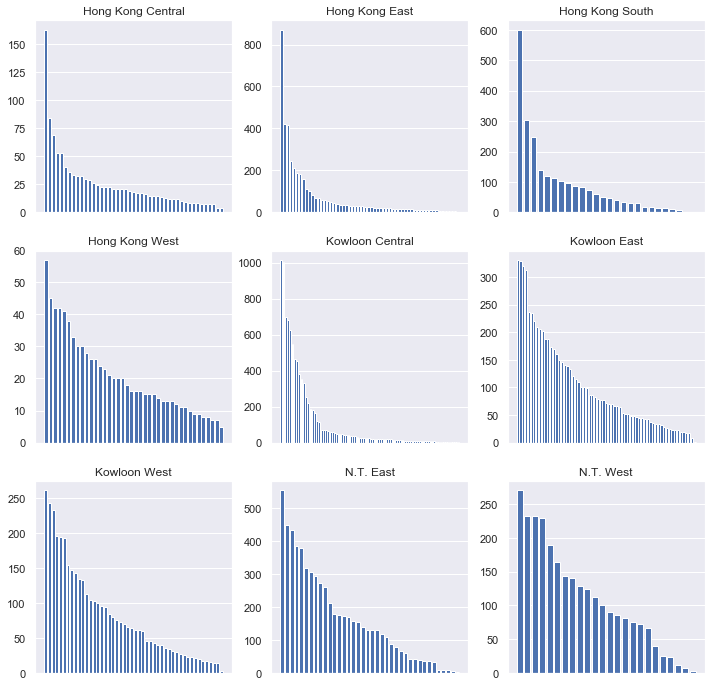

In [45]:
fig = plt.figure(figsize=(12,12))   
ax1 = fig.add_subplot(331)   
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

ax1.set(title = 'Hong Kong Central')
ax2.set(title = 'Hong Kong East')
ax3.set(title = 'Hong Kong South')
ax4.set(title = 'Hong Kong West')
ax5.set(title = 'Kowloon Central')
ax6.set(title = 'Kowloon East')
ax7.set(title = 'Kowloon West')
ax8.set(title = 'N.T. East')
ax9.set(title = 'N.T. West')

ax1.axes.get_xaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
ax3.axes.get_xaxis().set_visible(False)
ax4.axes.get_xaxis().set_visible(False)
ax5.axes.get_xaxis().set_visible(False)
ax6.axes.get_xaxis().set_visible(False)
ax7.axes.get_xaxis().set_visible(False)
ax8.axes.get_xaxis().set_visible(False)
ax9.axes.get_xaxis().set_visible(False)

ax1.bar(HKC.Estate_Name, HKC.Transactions)
ax2.bar(HKE.Estate_Name, HKE.Transactions)
ax3.bar(HKS.Estate_Name, HKS.Transactions)
ax4.bar(HKW.Estate_Name, HKW.Transactions)
ax5.bar(KC.Estate_Name, KC.Transactions)
ax6.bar(KE.Estate_Name, KE.Transactions)
ax7.bar(KW.Estate_Name, KW.Transactions)
ax8.bar(NTE.Estate_Name, NTE.Transactions)
ax9.bar(NTW.Estate_Name, NTW.Transactions)